# Mid-semester assignment - Deep Learning
Hello dear students,<br> This is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Itay Etelis
<br>
Student 2: Gilad Battat

## Fashion MNIST
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

# Part 1 : Neural Network in plain NumPy (50%)

## Import Libraries

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix


## Load Dataset

In [ ]:
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


## Data preprocessing (5%)

### Feature scaling

In [ ]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)

(784, 70000)


### Select two classes

In [ ]:
#TODO: select two classes (for example 2-Pullover and 4-Coat)

# Selected Classes: (0, 1)
column_idxs = np.where((y1.T == '0') | (y1.T == '1'))[0]
X1 = X1[:, column_idxs]
y1 = y1[:, column_idxs]

In [ ]:
column_idxs.shape

(14000,)

In [ ]:
# Sanity check, each class has 7,000 examples, meaning total of 14,000 examples, with 784 features.
X1.shape

(784, 14000)

### Split the data into Train set and Test set
For this part, you will need to implement a function that will shuffle the data in a random order. Note that you keep a matching order in Y (the label).

In [ ]:
def data_shuffle(X, Y):
  x_T = X.T
  y_T = Y.T
  c = np.c_[x_T,y_T]
  np.random.shuffle(c)
  X, Y = c[:,:x_T.shape[1]].T, c[:,x_T.shape[1]:].T
  return X, Y

In [ ]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)

def train_test_split(X, test_size=0.2):
  slice_amount = int(test_size * X.shape[1])
  return X[:, slice_amount:], X[:, :slice_amount]

X = X1
Y = y1

# Use shuffle on the train data
X, y = data_shuffle(X, Y)

X_train, X_test = train_test_split(X)
Y_train, Y_test = train_test_split(y)


### Test yourself

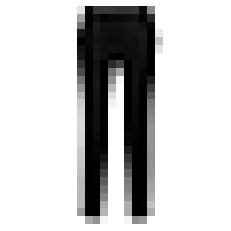

'1'

In [ ]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(np.asmatrix(X_train[:,i].reshape(28,28),float), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[0,i]

## Activation functions (5%)

In [ ]:
#TODO: Sigmoid activation function
def sigmoid(z):
  z = np.clip(z, -500, 500)
  return 1/(1 + np.exp(-z))

def sigmoid_prime(z):
    sg = sigmoid(z)
    return sg * (1 - sg)

## Loss function (10%)
BCE Loss function captures the intuition that the neural network should pay a high penalty(Loss→∞) when the estimated probability, with respect to the training example’s label, is completely wrong. On the other hand, the Loss should equal zero(Loss=0) when the estimated probability, with respect to the training example’s label, is correct. Simply put, the BCE Loss should equal zero in only two instances:<br>
* if the example is positively labeled(y=1) the neural network model should be completely sure that the example belongs to the positive class i.e p̂=1.
* if the example is negatively labeled(y=0) the neural network model should be completely sure that the example does not belong to the positive class i.e p̂=0.

<b> When we work with a computer, there are very high values or very low values that it cannot handle and that could cause the system to crash. <br>In order to overcome the case where the function returns values that strive for infinity you will need to understand which range of values causes the logarithm to return inf \ -inf and handle this within the function. </b>

In [ ]:
#TODO: Binary cross entropy
def log_loss(y_hat, y, eps=1e-15):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    y_hat = np.clip(y_hat, eps, 1 - eps)
    BCE = -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)     # Define BCE loss function
    return BCE

## NN Hyper Parameters

In [ ]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 32
learning_rate = 1e-1
epochs = 10

## Weight and Bias Initialization

In [ ]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(32, 784)
(32, 1)
(1, 32)
(1, 1)


## Training (15%)

In [ ]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
numOfTraining =  X.shape[1]

sigmoid_vec_func = np.vectorize(sigmoid)
sigmoid_prime_vec_func = np.vectorize(sigmoid_prime)

for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(numOfTraining):
    # TODO :  Forward propagation
    
    Z1 = np.dot(W1, X[:,j].reshape(X.shape[0],1)) + b1 # DO NOT FORGET TO ADD THE BIAS
    A1 = sigmoid_vec_func(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    Yout = int(Y[0,j])

    # TODO: Compute loss
    loss = log_loss(A2[0,0], Yout)
    avg_epoch_loss = avg_epoch_loss + loss

    # # TODO: Back propagation
    #dL/dZ2 = dL/dA2 * dA2/dZ2 = dA2 * derivative of sigma(Z2)
    dZ2 = A2 - Yout

    #dL/dZ2 * dZ2/dW2 (of size 1X32) = dZ2 * A1 
    dW2 = np.dot(dZ2, A1.T)

    #dL/dZ2 * dZ2/dB2 (of size 1X1) = dZ2 * 1 
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    #dZ2/dA1 * dL/dZ2 = W2 * dZ2
    dA1 = np.dot(W2.T, dZ2)

    # dA1 / dZ1 * dL / dA1 =  dA1 * derivative of sigma(A1)
    dZ1 = dA1 * sigmoid_prime_vec_func(Z1)

    # dZ1/dW1 * dL / dZ1 = dZ1 * x
    dW1 = np.dot(dZ1, X[:,j].T.reshape((1, 784)))
    # dZ1 / db1 * dL / dZ1  dZ1 * 1
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # TODO: Update weights
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
  avg_epoch_loss = avg_epoch_loss/numOfTraining
  loss_list.append(avg_epoch_loss)
  epoch_list.append(i)
  print("Epoch", i," Loss:", avg_epoch_loss)

Epoch 0  Loss: 0.09645242548085385
Epoch 1  Loss: 0.05837523352232311
Epoch 2  Loss: 0.0448435506638181
Epoch 3  Loss: 0.032530820314827014
Epoch 4  Loss: 0.027290573627896966
Epoch 5  Loss: 0.02667277445489315
Epoch 6  Loss: 0.02105061705131483
Epoch 7  Loss: 0.018309672431902044
Epoch 8  Loss: 0.026514683711654274
Epoch 9  Loss: 0.02525201568561191


## Results of part 1

### Loss Visualization

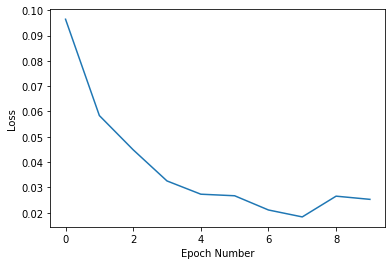

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

### Test your performance (15%)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

Achived Accuracy of:0.9860714285714286


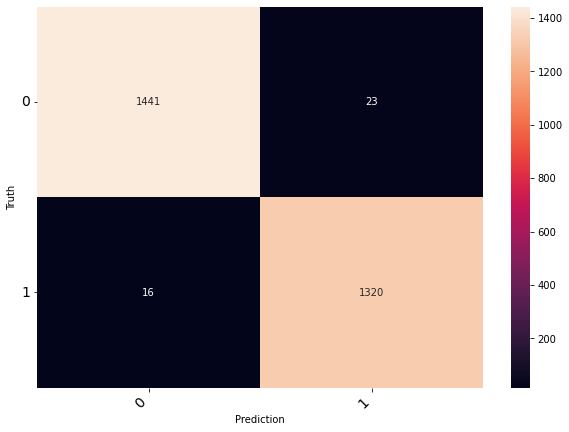

In [ ]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = W1.dot(X) + b1 # DO NOT FORGET TO ADD THE BIAS
A1 = sigmoid_vec_func(Z1)
Z2 = W2.dot(A1) + b2
A2 = sigmoid_vec_func(Z2)
predictions = np.zeros((1,Y.shape[1]))
labels = np.zeros((1,Y.shape[1]))

# Check your predictions against the test's labels
for i in range(Y.shape[1]):
  if (A2[0,i] > 0.5): 
    predictions[0,i] = 1
  else:
    predictions[0,i] = 0

  labels[0,i] = Y[0,i]

# Print the confusion matrix In order to test your performance
print_confusion_matrix(confusion_matrix(predictions.T, labels.T), ['0', '1'])
print(f"Achived Accuracy of:{accuracy_score(labels.T, predictions.T)}")

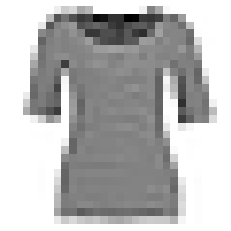

Real= 0 Predicted= [[4.59237422e-05]]


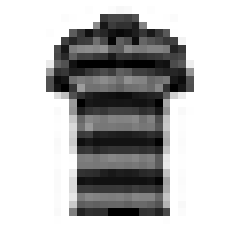

Real= 0 Predicted= [[0.00057917]]


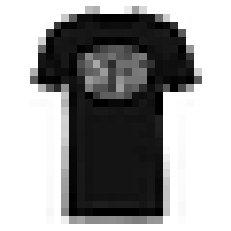

Real= 0 Predicted= [[6.32844794e-05]]


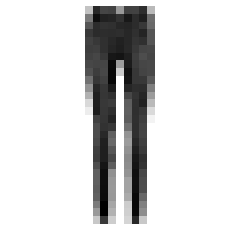

Real= 1 Predicted= [[0.99873114]]


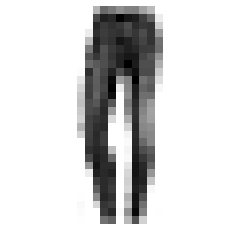

Real= 1 Predicted= [[0.99993514]]


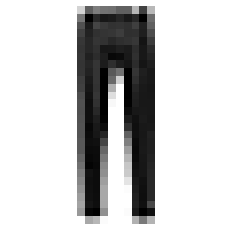

Real= 1 Predicted= [[0.99999768]]


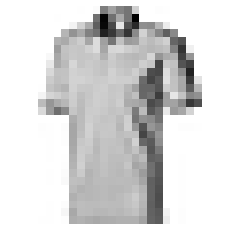

Real= 0 Predicted= [[0.0082441]]


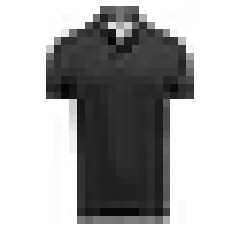

Real= 0 Predicted= [[0.00014257]]


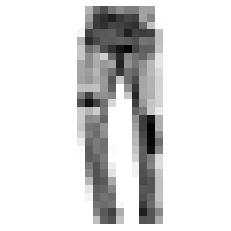

Real= 1 Predicted= [[0.99956398]]


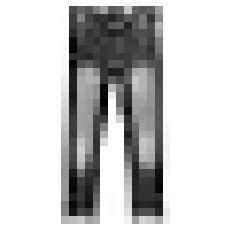

Real= 1 Predicted= [[0.99967244]]


In [ ]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random

X = X_test
Y = Y_test

for _ in range(10):
  i = random.randint(2000)
  plt.imshow(np.asmatrix(X_test[:,i].reshape(28,28),float), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()

  Z1 = np.dot(W1, X[:,i].reshape(X.shape[0], 1)) + b1 # DO NOT FORGET TO ADD THE BIAS
  A1 = sigmoid_vec_func(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)
  Yout = int(Y[0,i])
  print("Real=", Yout, "Predicted=",A2)

# Part 2 : Neural Network with Tensorflow Keras (50%)

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Load Dataset

4422102/4422102 [==============================] - 0s 0us/step


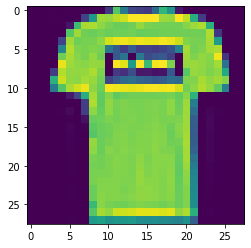

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
plt.imshow(X_train[1])
plt.show()

## Data preprocessing

### Feature scaling

In [ ]:
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.

### Select two classes

In [ ]:
def select_classes(X_train, y_train, X_test, y_test):
    selected_classes = lambda tag: True if tag in [0, 1] else False
    X_train = X_train[[selected_classes(yi) for yi in y_train]]
    y_train = y_train[[selected_classes(yi) for yi in y_train]]

    X_test = X_test[[selected_classes(yi) for yi in y_test]]
    y_test = y_test[[selected_classes(yi) for yi in y_test]]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = select_classes(X_train, y_train, X_test, y_test)

So we need to convert 1-dimensional class arrays to multi-dimensional class matrices<br>
Read about np_utils here: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:
from keras.utils import np_utils
num_of_classes = 2
y_train = np_utils.to_categorical(y_train, num_classes=num_of_classes)
y_test = np_utils.to_categorical(y_test, num_classes=num_of_classes)

In [ ]:
print(f"X_train shape is: {X_train.shape}")
print(f"X_test shape is: {X_test.shape}")
print(f"y_train shape is: {y_train.shape}")
print(f"y_test shape is: {y_test.shape}")

X_train shape is: (12000, 28, 28)
X_test shape is: (2000, 28, 28)
y_train shape is: (12000, 2)
y_test shape is: (2000, 2)


### Build the network layers - Base Model
We chose batch size of 32 because it's a standard. <br>
sigmoind is considered a good and popular activation function. <br>
Our network structure is 784 -> 40 -> 2. <br>
the inner amount of neurons was chosen so that there is a proportional reduction in size since 784 / 40 ~= 40 / 2. <br>

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(150, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

batch_size = 32
input_shape = (batch_size,) +  X_train[0].shape
model.build(input_shape)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (32, 784)                 0         
                                                                 
 dense_2 (Dense)             (32, 150)                 117750    
                                                                 
 dense_3 (Dense)             (32, 2)                   302       
                                                                 
Total params: 118,052
Trainable params: 118,052
Non-trainable params: 0
_________________________________________________________________
None


#### Build the Optimizer
Read about the Optimizer here: https://keras.io/api/optimizers/

In [ ]:
from keras.optimizers import SGD
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_path = "saved_models/best_conf.ckpt"
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=False,
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max')

#### Training
Use the fit method to train your model, then store the results within the variable "history".


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint],
                    verbose=True,
                    shuffle=True)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4833 - accuracy: 0.8882 - val_loss: 0.3347 - val_accuracy: 0.9295
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2612 - accuracy: 0.9521 - val_loss: 0.2148 - val_accuracy: 0.9480
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1842 - accuracy: 0.9601 - val_loss: 0.1682 - val_accuracy: 0.9550
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1502 - accuracy: 0.9638 - val_loss: 0.1439 - val_accuracy: 0.9575
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1306 - accuracy: 0.9651 - val_loss: 0.1278 - val_accuracy: 0.9600
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1169 - accuracy: 0.9675 - val_loss: 0.1160 - val_accuracy: 0.9635
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1062 - accuracy: 0.9694 - val_loss: 0.1070 - val_accuracy: 0.9660
Epoch 

#### Save Trained model (weights)
Read about Save and load models in tensorflow.keras here: [https://www.tensorflow.org/tutorials/keras/save_and_load](https://www.tensorflow.org/tutorials/keras/save_and_load)


In [ ]:
# SAVE THE TRAINED MODEL
model.load_weights("saved_models/best_conf.ckpt")

#### Loss and Accuracy Visualization
Show  on plot the loss during training

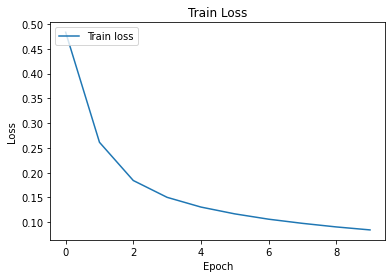

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss'], loc='upper left')
plt.show()

Show  on plot the accuracy during training

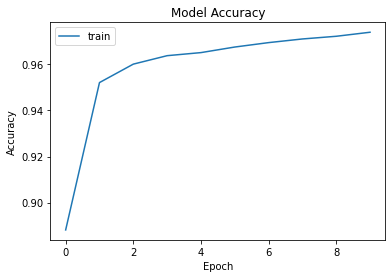

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_actual = np.argmax(y_test, axis=1)
is_correct = []

for i, pred in enumerate(y_pred):
    is_correct += [1 if y_actual[i] == y_pred[i] else 0]

accuracy =  100 * sum(is_correct) / len(is_correct)
print(f"accuracy is: {accuracy}")

63/63 [==============================] - 0s 2ms/step
accuracy is: 96.85


#### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

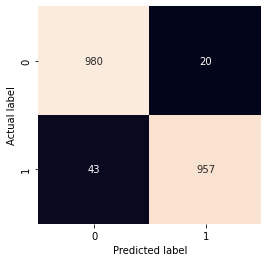

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False,
                    fmt='d')
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")

conf_mat = confusion_matrix(y_actual, y_pred)
plot_conf_mat(conf_mat)    

**Conclusion:** <br>
The results are impressive with 97% accuracy!

###First Experiment: <br>
Adding a new hidden layer and changing the activation function. <br>
Now the activation is with relu and the network structure is: 784 -> 150 -> 40 -> 2.

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(2, activation='softmax'))

batch_size = 32
input_shape = (batch_size,) +  X_train[0].shape
model.build(input_shape)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (32, 784)                 0         
                                                                 
 dense_4 (Dense)             (32, 150)                 117750    
                                                                 
 dense_5 (Dense)             (32, 40)                  6040      
                                                                 
 dense_6 (Dense)             (32, 2)                   82        
                                                                 
Total params: 123,872
Trainable params: 123,872
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.optimizers import SGD
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=False,
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max')

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint],
                    verbose=True,
                    shuffle=True)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2143 - accuracy: 0.9507 - val_loss: 0.0994 - val_accuracy: 0.9665
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0783 - accuracy: 0.9758 - val_loss: 0.0686 - val_accuracy: 0.9785
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0598 - accuracy: 0.9808 - val_loss: 0.0582 - val_accuracy: 0.9810
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9827 - val_loss: 0.0532 - val_accuracy: 0.9820
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0478 - accuracy: 0.9843 - val_loss: 0.0501 - val_accuracy: 0.9830
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0447 - accuracy: 0.9855 - val_loss: 0.0480 - val_accuracy: 0.9815
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.0460 - val_accuracy: 0.9840
Epoch 

In [ ]:
# SAVE THE TRAINED MODEL
model.load_weights("saved_models/best_conf.ckpt")

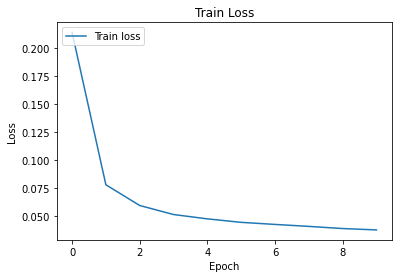

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss'], loc='upper left')
plt.show()

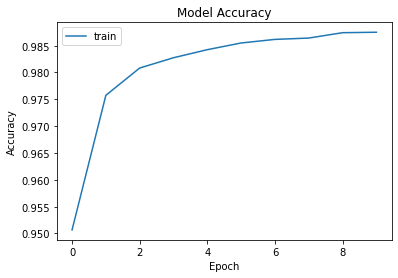

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_actual = np.argmax(y_test, axis=1)
is_correct = []

for i, pred in enumerate(y_pred):
    is_correct += [1 if y_actual[i] == y_pred[i] else 0]

accuracy =  100 * sum(is_correct) / len(is_correct)
print(f"accuracy is: {accuracy}")

63/63 [==============================] - 0s 1ms/step
accuracy is: 98.4


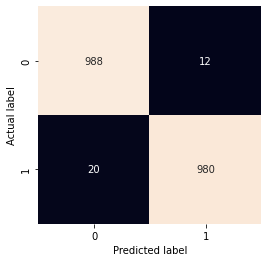

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False,
                    fmt='d')
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")

conf_mat = confusion_matrix(y_actual, y_pred)
plot_conf_mat(conf_mat)  

**Conclusion:** <br>
The results are impressive with 98.45% accuracy! <br>
This experiment turned out to achieve higher results than the base model.

###Second Experiment:
Now we increased the amount of epochs to 12 and chose Adam optimizer instead of SGD.

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(2, activation='softmax'))

batch_size = 32
input_shape = (batch_size,) +  X_train[0].shape
model.build(input_shape)
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (32, 784)                 0         
                                                                 
 dense_7 (Dense)             (32, 150)                 117750    
                                                                 
 dense_8 (Dense)             (32, 40)                  6040      
                                                                 
 dense_9 (Dense)             (32, 2)                   82        
                                                                 
Total params: 123,872
Trainable params: 123,872
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.optimizers import Adam
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=False,
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max')

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=12, 
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint],
                    verbose=True,
                    shuffle=True)

Epoch 1/12
375/375 [==============================] - 2s 4ms/step - loss: 0.0678 - accuracy: 0.9771 - val_loss: 0.0575 - val_accuracy: 0.9795
Epoch 2/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9899 - val_loss: 0.0302 - val_accuracy: 0.9890
Epoch 3/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0331 - val_accuracy: 0.9875
Epoch 4/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0209 - accuracy: 0.9931 - val_loss: 0.0292 - val_accuracy: 0.9885
Epoch 5/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0177 - accuracy: 0.9939 - val_loss: 0.0263 - val_accuracy: 0.9945
Epoch 6/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0335 - val_accuracy: 0.9900
Epoch 7/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0141 - accuracy: 0.9948 - val_loss: 0.0279 - val_accuracy: 0.9890
Epoch 

In [ ]:
# SAVE THE TRAINED MODEL
model.load_weights("saved_models/best_conf.ckpt")

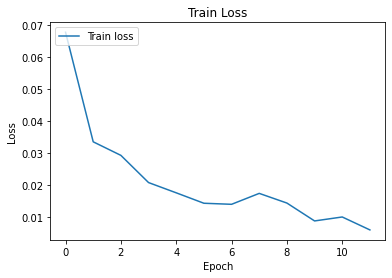

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss'], loc='upper left')
plt.show()

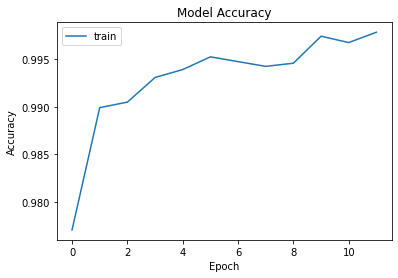

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_actual = np.argmax(y_test, axis=1)
is_correct = []

for i, pred in enumerate(y_pred):
    is_correct += [1 if y_actual[i] == y_pred[i] else 0]

accuracy =  100 * sum(is_correct) / len(is_correct)
print(f"accuracy is: {accuracy}")

63/63 [==============================] - 0s 2ms/step
accuracy is: 99.45


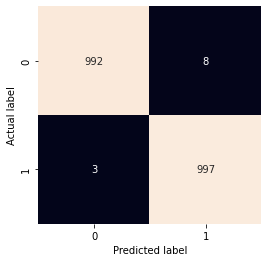

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False,
                    fmt='d')
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")

conf_mat = confusion_matrix(y_actual, y_pred)
plot_conf_mat(conf_mat)  

**Conclusion:** <br>
The results are impressive with 99.4% accuracy! <br>
This experiment turned out to achieve even higher results than both the base model and the first experiment.

## Test Environment (of part 2 only)
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.<br>
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

### Load trained model

In [ ]:
# LOAD THE TRAINED MODEL
model.load_weights("saved_models/best_conf.ckpt")

### Single prediction
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single image of an item of clothing (28x28 image).<br>
Then build a function that takes this image, loads the weights of the trained model (If you haven't loaded it before) and prints a prediction.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
def select_classes(X_train, y_train, X_test, y_test):
    selected_classes = lambda tag: True if tag in [0, 1] else False
    X_train = X_train[[selected_classes(yi) for yi in y_train]]
    y_train = y_train[[selected_classes(yi) for yi in y_train]]

    X_test = X_test[[selected_classes(yi) for yi in y_test]]
    y_test = y_test[[selected_classes(yi) for yi in y_test]]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = select_classes(X_train, y_train, X_test, y_test)

In [ ]:
def single_prediction(sample_data):
    model.load_weights("saved_models/best_conf.ckpt")
    data = np.array([sample_data])
    data = data.astype(float) / 255.

    y_pred = model.predict(data)  
    y_pred = np.argmax(y_pred, axis=1)

    if y_pred[0] == 0:
      prediction = "T-shirt"
    else:
      prediction = "Trouser"

    print(f'The model predicted: {prediction}')
    plt.imshow(sample_data)
    plt.show()

1/1 [==============================] - 0s 15ms/step
The model predicted: Trouser


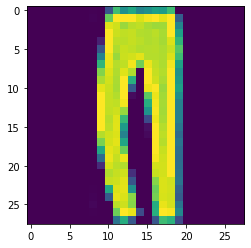

In [ ]:
sample = X_test[0]
single_prediction(sample)